<a href="https://colab.research.google.com/github/harsh3294/Fake-Job-Posting/blob/master/fake_job_posting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wordcloud

In [ ]:
!pip install -U spacy

     |████████████████████████████████| 12.8MB 11.5MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 1.1MB 44.9MB/s 
     |████████████████████████████████| 460kB 50.1MB/s 
     |████████████████████████████████| 9.1MB 48.7MB/s 
     |████████████████████████████████| 122kB 41.3MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=45e4a4bb0a28f1c7601164d318bf8e37e3ac0a69eb48a94f5e1081b6863ae67b
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: smart-open 5.0.0
    Uninstalling smart-open-5.0.0:
      Successfully uninstalled smart-open-5.0.0
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly

In [ ]:
# import all packages in python environment to be used in the model 
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/Fake Job Detection/fake_job_postings.csv')

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.shape

(17880, 18)

In [ ]:
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type'] # these are the data which we require as input
for colu in columns:
    del df[colu]

In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
#missing values 
df.isna().sum()

title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
df.fillna('',inplace=True)

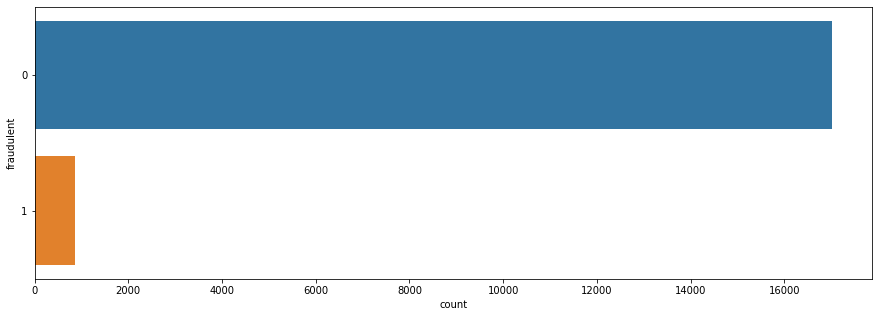

In [ ]:
#graphival analyssis 
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show()


In [ ]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
exp = dict(df.required_experience.value_counts())
del exp['']

In [ ]:
exp

{'Associate': 2297,
 'Director': 389,
 'Entry level': 2697,
 'Executive': 141,
 'Internship': 381,
 'Mid-Senior level': 3809,
 'Not Applicable': 1116}

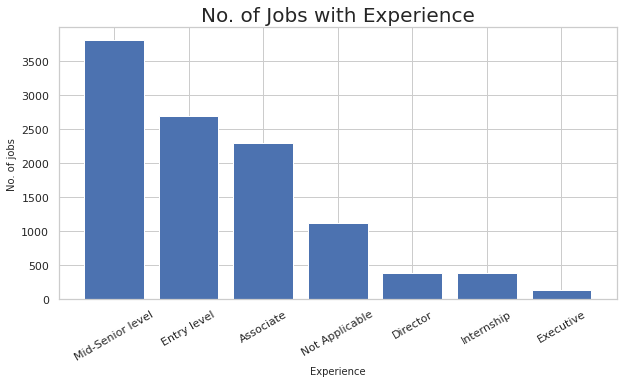

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(), exp.values())
plt.title('No. of Jobs with Experience',size=20)
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=30)
plt.show()

In [ ]:
def split(location):
    l = location.split(',')
    return l[0]
df['country'] = df.location.apply(split)

In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [ ]:
df['text']=df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [ ]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [ ]:
fraudjobs_text = df[df.fraudulent==1].text
realjobs_text = df[df.fraudulent==0].text

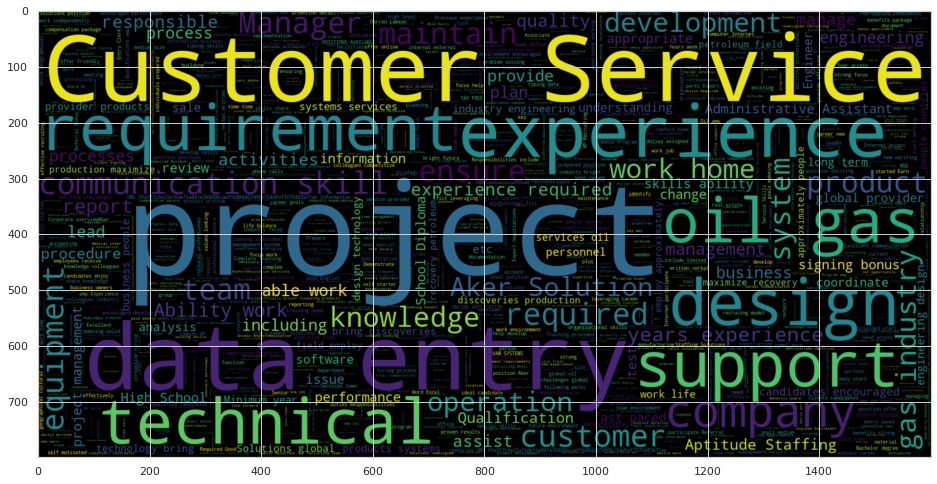

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [ ]:
!pip install spacy && python -m spacy download en

2021-05-27 07:50:07.607780: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.7MB 7.2MB/s 
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
punctuations = string.punctuation

nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

parser = English()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    
    mytockens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    
    return mytokens

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}
    
def clean_text(text):
    return text.strip().lower()

In [ ]:
df['text'] = df['text'].apply(clean_text)

In [ ]:
cv = TfidfVectorizer(max_features = 100)
x = cv.fit_transform(df['text'])
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())
df.drop(["text"], axis=1, inplace=True)
main_df = pd.concat([df1,df], axis=1)

In [ ]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,based,be,best,business,but,by,can,client,clients,communication,company,customer,customers,data,design,development,do,environment,experience,for,from,full,has,have,help,high,if,in,including,industry,...,product,products,project,provide,quality,re,required,sales,service,services,skills,software,solutions,strong,support,team,technical,technology,that,the,their,this,through,time,to,up,us,we,web,well,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041120,0.000000,0.042424,0.036488,0.000000,0.755238,0.000000,0.078653,0.000000,0.000000,0.000000,0.043071,0.034178,0.040130,0.131541,0.000000,0.000000,0.000000,0.037122,0.031382,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.023411,0.081456,0.000000,0.039904,0.086128,0.054325,0.000000,0.00000,0.0,0.238944,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.12972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127976,0.053706,0.0,0.041037,0.000000,0.291636,0.069614,0.000000,0.000000,0.032185,0.184005,0.000000,0.000000,0.204948,0.000000,0.040199,0.000000,0.000000,0.186067,0.051026,0.068029,0.000000,0.000000,0.000000,0.000000,0
1,0.021895,0.094183,0.035394,0.024292,0.041787,0.029771,0.490896,0.056626,0.060050,0.052431,0.043397,0.043898,0.000000,0.078283,0.000000,0.075322,0.085429,0.053200,0.048722,0.021256,0.000000,0.115046,0.000000,0.0,0.0,0.000000,0.051697,0.022003,0.093836,0.151587,0.089252,0.000000,0.098635,0.062214,0.000000,0.04378,0.0,0.193831,0.136651,0.000000,...,0.025735,0.0,0.174234,0.000000,0.050263,0.00000,0.000000,0.000000,0.220411,0.000000,0.017473,0.025821,0.000000,0.000000,0.000000,0.046129,0.0,0.000000,0.107736,0.453268,0.000000,0.070882,0.000000,0.018429,0.152191,0.000000,0.019987,0.130395,0.026812,0.000000,0.000000,0.078004,0.165735,0.043827,0.116862,0.099327,0.000000,0.204854,0.130452,0
2,0.000000,0.000000,0.176807,0.000000,0.041749,0.089231,0.397029,0.113149,0.000000,0.000000,0.000000,0.029239,0.000000,0.000000,0.000000,0.037626,0.000000,0.159456,0.000000,0.000000,0.071812,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.116499,0.035668,0.000000,0.049272,0.000000,0.000000,0.00000,0.0,0.113914,0.000000,0.050261,...,0.000000,0.0,0.058025,0.046249,0.050217,0.00000,0.000000,0.000000,0.000000,0.219864,0.069826,0.000000,0.048159,0.094592,0.048809,0.000000,0.0,0.000000,0.215275,0.524358,0.000000,0.000000,0.048008,0.000000,0.350889,0.000000,0.000000,0.026055,0.000000,0.000000,0.000000,0.062346,0.307512,0.058383,0.000000,0.000000,0.000000,0.094462,0.074476,0
3,0.023267,0.000000,0.018806,0.000000,0.000000,0.094909,0.695542,0.000000,0.031906,0.037144,0.000000,0.015550,0.000000,0.145581,0.024418,0.020010,0.000000,0.000000,0.000000,0.022588,0.019095,0.024451,0.054739,0.0,0.0,0.045661,0.054937,0.070146,0.085471,0.123912,0.000000,0.000000,0.000000,0.016528,0.022762,0.00000,0.0,0.084814,0.096809,0.053459,...,0.000000,0.0,0.000000,0.049192,0.053412,0.00000,0.024291,0.173103,0.000000,0.023385,0.018567,0.000000,0.051223,0.025153,0.025957,0.065359,0.0,0.099884,0.049066,0.278862,0.042360,0.000000,0.127657,0.019584,0.335896,0.023612,0.000000,0.069283,0.000000,0.000000,0.023132,0.049735,0.075480,0.046573,0.000000,0.105551,0.019806,0.050236,0.059411,0
4,0.000000,0.000000,0.068009,0.000000,0.040147,0.028602,0.606379,0.081605,0.115386,0.000000,0.000000,0.028117,0.094780,0.037605,0.000000,0.000000,0.000000,0.051112,0.000000,0.040844,0.069056,0.044212,0.049490,0.0,0.0,0.041282,0.000000,0.000000,0.051516,0.201651,0.000000,0.043906,0.047382,0.000000,0.000000,0.00000,0.0,0.394354,0.043762,0.000000,...,0.000000,0.0,0.000000,0.000000,0.144870,0.00000,0.000000,0.000000,0.084704,0.169141,0.000000,0.000000,0.092621,0.000000,0.000000,0.029545,0.0,0.000000,0.029574,0.275038,0.000000,0.000000,0.000000,0.035412,0.269940,0.000000,0.000000,0.050111,0.000000,0.044230,0.000000,0.000000,0.159230,0.028071,0.037425,0.000000,0.035814,0.030279,0.107427,0


In [ ]:
Y = main_df.iloc[:,-1]
X = main_df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12516, 100)
(12516,)
(5364, 100)
(5364,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy")
model=rfc.fit(X_train,y_train)

In [ ]:
pred = rfc.predict(X_test)
score = accuracy_score(y_test, pred)
score

0.9724086502609992

In [ ]:
print("Classification Report\n")
print(classification_report(y_test, pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5112
           1       1.00      0.41      0.58       252

    accuracy                           0.97      5364
   macro avg       0.99      0.71      0.79      5364
weighted avg       0.97      0.97      0.97      5364

Confusion Matrix

[[5112    0]
 [ 148  104]]
